<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [301]:
from google.colab import files
import pandas as pd
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import numpy as np
import seaborn as sns
uploaded= files.upload()


Saving house-votes-84.data to house-votes-84 (9).data


In [302]:
#Load Dataset
df= pd.read_csv('house-votes-84.data').replace('?', np.NaN)
df.head()


,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
1,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [303]:
#rename columns
df.rename(columns={
    'n': 'handi_infants',
    'y': 'water_project',
    'n.1': 'budget_res',
    'y.1': 'phys_fee_freeze',
    'y.2': 'el_sal_aid',
    'y.3': 'rel_group_schools',
    'n.2': 'anti_sat_test_ban',
    'n.3': 'aid_to_nic',
    'n.4': 'mx_missile',
    'y.4': 'immigration',
    '?': 'syn_fuels_cut',
    'y.5': 'education',
    'y.6': 'superfund_r_t_s',
    'y.7': 'crime',
    'n.5': 'duty_free_exports',
    'y.8': 'export_admin_s_africa'
}, inplace= True)
df

,republican,handi_infants,water_project,budget_res,phys_fee_freeze,el_sal_aid,rel_group_schools,anti_sat_test_ban,aid_to_nic,mx_missile,immigration,syn_fuels_cut,education,superfund_r_t_s,crime,duty_free_exports,export_admin_s_africa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
1,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
5,democrat,n,y,n,y,y,y,n,n,n,n,n,n,NaN,y,y,y
6,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,NaN,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
8,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,NaN,NaN
9,republican,n,y,n,y,y,n,n,n,n,n,NaN,NaN,y,y,n,n


In [0]:
#replace y with 1 and n with 0
df.replace('y', 1, inplace= True)
df.replace('n', 0, inplace= True)
df.replace('republican', 1, inplace= True)
df.replace('democrat', 0, inplace= True)

In [306]:
#filling nas with mean
df.isna().sum()
df.fillna(0.5, inplace= True)
df



,republican,handi_infants,water_project,budget_res,phys_fee_freeze,el_sal_aid,rel_group_schools,anti_sat_test_ban,aid_to_nic,mx_missile,immigration,syn_fuels_cut,education,superfund_r_t_s,crime,duty_free_exports,export_admin_s_africa
0,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5
1,0,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0
4,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
5,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,1.0
6,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,1.0
7,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
8,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5
9,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,1.0,1.0,0.0,0.0


In [309]:
#get democrats and republicans
republicans= df[df['republican']== 1]
democrats= df[df['republican']== 0]

,republican,handi_infants,water_project,budget_res,phys_fee_freeze,el_sal_aid,rel_group_schools,anti_sat_test_ban,aid_to_nic,mx_missile,immigration,syn_fuels_cut,education,superfund_r_t_s,crime,duty_free_exports,export_admin_s_africa
1,0,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0
4,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
5,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,1.0
8,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5
11,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.5,0.5
12,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.5,1.0,1.0,0.5,0.0,0.0,1.0,0.5
15,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.5,1.0,1.0,1.0,0.5,0.0,0.0,1.0
16,0,1.0,0.5,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [310]:
#ttesting
def test(dataframe):
  for column in columns:
    statistics, p_value= stats.ttest_ind(republicans[column], democrats[column])
    print("For " + column + " the stats are " + str(statistics) + " and the p value is " + str(p_value) + ".")
    if p_value <= 0.05:
      print("Significant")
    else:
      print("Not significant")
test(df)

For handi_infants the stats are -9.17148782092838 and the p value is 1.922728512482026e-18.
Significant
For water_project the stats are 0.024048886113121355 and the p value is 0.9808247187756939.
Not significant
For budget_res the stats are -22.73211560569363 and the p value is 8.219473078046751e-76.
Significant
For phys_fee_freeze the stats are 45.958538085883866 and the p value is 1.9500311506281485e-168.
Significant
For el_sal_aid the stats are 20.82399847692794 and the p value is 3.410410633450394e-67.
Significant
For rel_group_schools the stats are 9.772154900139162 and the p value is 1.6442763856795663e-20.
Significant
For anti_sat_test_ban the stats are -12.380354212307402 and the p value is 2.4386254185065263e-30.
Significant
For aid_to_nic the stats are -17.714590105306993 and the p value is 3.529997525423928e-53.
Significant
For mx_missile the stats are -16.2604400553107 and the p value is 9.985362153032343e-47.
Significant
For immigration the stats are 1.6771264108577377 and

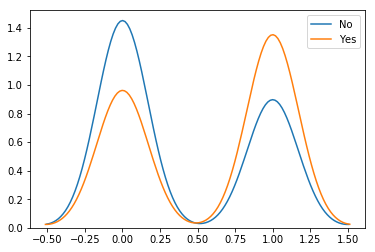

In [316]:
# sns.kdeplot(democrats['handi_infants'], label= 'democrats')
# sns.kdeplot(republicans['handi_infants'], label= 'republicans')
sns.kdeplot(democrats['handi_infants'] ==0, label= 'No');
sns.kdeplot(democrats['handi_infants'] ==1, label= 'Yes');

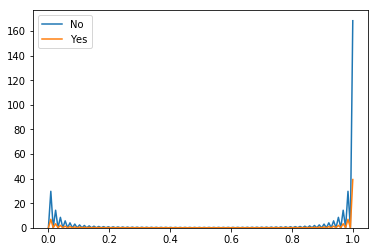

In [317]:
sns.kdeplot(republicans['handi_infants']== 0, label= 'No')
sns.kdeplot(republicans['handi_infants']==1, label= 'Yes')